In [27]:
from helper import getData, getLogChannels, getChannelValuesAsDict, getTime, getXaxis
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

from glob import glob

In [3]:
data_dir = "../../../../../data/MIT_cca_calibration/"

In [8]:
# check if data_dir exists
if not glob(data_dir):
    print("Data directory does not exist")
else:
    files_paths = glob(data_dir + "*/*.hdf5")
files_paths = sorted(files_paths)

In [9]:
files_paths

['../../../../../data/MIT_cca_calibration/20240217/cca_QKY_WG_LNF_s2p_Kcal.hdf5',
 '../../../../../data/MIT_cca_calibration/20240217/cca_QWA_LNFWG_s2p_Kcal.hdf5',
 '../../../../../data/MIT_cca_calibration/20240506/cca_LNF-LNR10_30A_226Z_s2p_Kcal.hdf5',
 '../../../../../data/MIT_cca_calibration/20240506/cca_QKY1_s2p_WGcal.hdf5',
 '../../../../../data/MIT_cca_calibration/20240506/cca_QKY1_s2p_WGcal_cryo.hdf5',
 '../../../../../data/MIT_cca_calibration/20240506/cca_QKY1_s2p_WGcal_cryo_2.hdf5',
 '../../../../../data/MIT_cca_calibration/20240506/cca_QKY1_s2p_WGcal_cryo_3.hdf5',
 '../../../../../data/MIT_cca_calibration/20240506/cca_QKY1_s2p_WGcal_post_cryo.hdf5',
 '../../../../../data/MIT_cca_calibration/20240506/cca_QKY1_s2p_WGcal_post_cryo_2.hdf5',
 '../../../../../data/MIT_cca_calibration/20240506/cca_QKY1_s2p_WGcal_post_cryo_3.hdf5',
 '../../../../../data/MIT_cca_calibration/20240506/cca_QKY1_s2p_WGcal_post_cryo_4.hdf5',
 '../../../../../data/MIT_cca_calibration/20240506/cca_QKY1_s2p_WG

In [10]:
measurements = {}
for file_path in files_paths:
    name = file_path.split("/")[-1].split(".")[0]
    measurements[name] = {}

    time = getTime(file_path) 
    print("--- ",time,"\t",name)
    log_channels = getLogChannels(file_path)

    measurements[name]['data'] = {}
    for channel in log_channels:
        measurements[name]['data'][channel['name'].decode()] = getData(file_path, channel['name'])
    
    measurements[name]["xaxis"] = getXaxis(file_path, channel['name']) # Here we are assuming that all logchannels have the same x-axis
    measurements[name]["time"] = time
    measurements[name]["channel_values"] = getChannelValuesAsDict(file_path)
    measurements[name]["log_channels"] = log_channels
    

---  2024-02-17 18:17:27 	 cca_QKY_WG_LNF_s2p_Kcal
---  2024-02-17 16:42:57 	 cca_QWA_LNFWG_s2p_Kcal
---  2024-05-06 10:22:37 	 cca_LNF-LNR10_30A_226Z_s2p_Kcal
---  2024-05-06 15:23:24 	 cca_QKY1_s2p_WGcal
---  2024-05-06 15:29:42 	 cca_QKY1_s2p_WGcal_cryo
---  2024-05-06 15:32:48 	 cca_QKY1_s2p_WGcal_cryo_2
---  2024-05-06 15:36:27 	 cca_QKY1_s2p_WGcal_cryo_3
---  2024-05-06 15:42:45 	 cca_QKY1_s2p_WGcal_post_cryo
---  2024-05-06 15:45:48 	 cca_QKY1_s2p_WGcal_post_cryo_2
---  2024-05-06 16:06:08 	 cca_QKY1_s2p_WGcal_post_cryo_3
---  2024-05-06 16:14:20 	 cca_QKY1_s2p_WGcal_post_cryo_4
---  2024-05-06 17:12:14 	 cca_QKY1_s2p_WGcal_post_cryo_5
---  2024-05-06 10:49:44 	 cca_QWA_QWA_s2p_Kcal
---  2024-05-06 14:46:24 	 cca_QWA_QWA_s2p_WGcal
---  2024-05-06 14:56:19 	 cca_QWS_s2p_WGcal


In [11]:
# Explore dataset:
data_set = "cca_LNF-LNR10_30A_226Z_s2p_Kcal"

for key in measurements[data_set].keys():
    print("\n", key, ":", measurements[data_set][key])


 data : {'E5080B - S22': array([[-0.18268681+0.07471101j, -0.18213058+0.07484151j,
        -0.18236502+0.07624203j, ...,  0.21579193-0.09878701j,
         0.21641183-0.09840839j,  0.21523917-0.09988774j]]), 'E5080B - S11': array([[-0.27408069-0.17243968j, -0.27426136-0.17207208j,
        -0.27465084-0.17291343j, ...,  0.27153   +0.10099554j,
         0.2713396 +0.09932383j,  0.27249071+0.09959682j]]), 'E5080B - S21': array([[-9.05137539-20.7216835j , -9.0625    -20.66781235j,
        -9.07331657-20.68684387j, ..., 20.87549782 -6.8048687j ,
        20.87252235 -6.83032179j, 20.88431168 -6.85412359j]]), 'E5080B - S12': array([[-0.00148806+0.00395648j, -0.00161836+0.00389474j,
        -0.00148673+0.00397404j, ..., -0.00400432-0.00427334j,
        -0.00403313-0.00427974j, -0.00412823-0.00438472j]])}

 xaxis : [2.3000e+10 2.3001e+10 2.3002e+10 ... 2.6998e+10 2.6999e+10 2.7000e+10]

 time : 2024-05-06 10:22:37

 channel_values : {'E5080B - # of averages': 4.0, 'E5080B - # of points': 4001.0

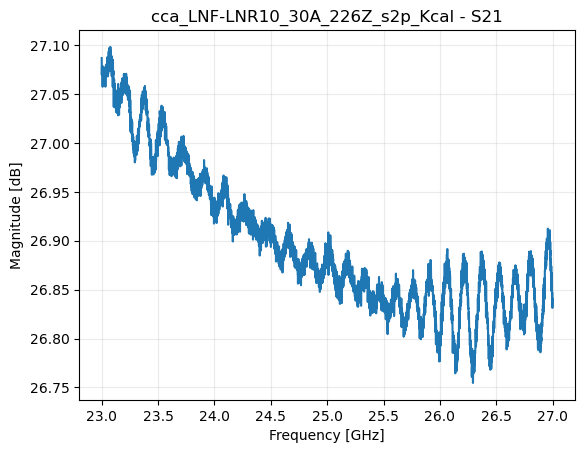

In [13]:
#plot S21 of the dataset

fig, ax = plt.subplots()

S21 = measurements[data_set]['data']['E5080B - S21'][0]
frequencies = measurements[data_set]['xaxis']

ax.set_title(data_set+" - S21")
ax.set_xlabel("Frequency [GHz]")
ax.set_ylabel("Magnitude [dB]")
ax.plot(frequencies/1e9, 20*np.log10(np.abs(S21)))
ax.grid(alpha=0.25)

/var/folders/1s/5y8mctlx33vd_ld_b_rq6zh40000gn/T/ipykernel_58446/1189626061.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('jet')


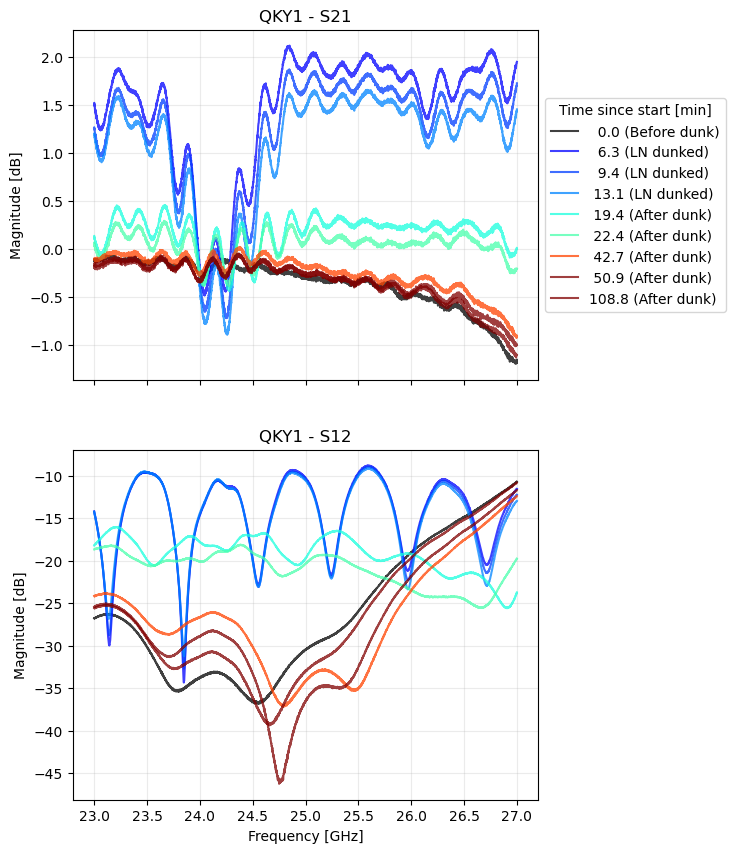

In [60]:
# Plot the isolation and insertion loss for the QKY circulator at different measurement times
# use a coninuous color scale for the different times

fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(6, 10))


time_0 = measurements["cca_QKY1_s2p_WGcal"]["time"]
time_max = measurements["cca_QKY1_s2p_WGcal_post_cryo_4"]["time"]-time_0

# Define the colormap
cmap = plt.cm.get_cmap('jet')
# Normalize the time values to the range [0, 1]
norm = mcolors.Normalize(vmin=0, vmax=time_max.seconds)
# Create a scalar mappable object
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)

for measurement in measurements.keys():
    if "QKY1" in measurement:
        dtime = measurements[measurement]["time"]-time_0
        S21 = measurements[measurement]['data']['E5080B - S21'][0]
        S12 = measurements[measurement]['data']['E5080B - S12'][0]
        frequencies = measurements[measurement]['xaxis']

        if dtime.seconds == 0:
            color = "black"
        else:
             color = sm.to_rgba(dtime.seconds)

        label_add = ""
        if "post_cryo" in measurement:
            label_add = " (After dunk)"
        elif "cryo" in measurement:
            label_add = " (LN dunked)"
        else:
            label_add = " (Before dunk)"
        
        
        ax[0].plot(frequencies/1e9, 20*np.log10(np.abs(S21)), label="{:5.1f}{}".format(dtime.seconds/60, label_add), color=color, alpha=0.75)
        ax[1].plot(frequencies/1e9, 20*np.log10(np.abs(S12)), label="{:5.1f}{}".format(dtime.seconds/60, label_add), color=color, alpha=0.75)

ax[0].set_title("QKY1 - S21")
ax[0].set_ylabel("Magnitude [dB]")
ax[0].grid(alpha=0.25)

# put the legend on the right of the figure
ax[0].legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Time since start [min]")

ax[1].set_title("QKY1 - S12")
ax[1].set_xlabel("Frequency [GHz]")
ax[1].set_ylabel("Magnitude [dB]")
ax[1].grid(alpha=0.25)

plt.savefig("QKY1_S21_S12.png", dpi=300, bbox_inches='tight')